In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('HousePrices.csv')
df

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [3]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
2072,946,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900


In [5]:
df.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [6]:
for col in df.columns:
    print(col,"\t",df[col].dtype,'\t',df[col].isnull().sum())

Id 	 int64 	 0
Dwell_Type 	 int64 	 0
Zone_Class 	 object 	 0
LotFrontage 	 float64 	 320
LotArea 	 int64 	 0
Road_Type 	 object 	 0
Alley 	 object 	 1944
Property_Shape 	 object 	 0
LandContour 	 object 	 0
Utilities 	 object 	 0
LotConfig 	 object 	 0
LandSlope 	 object 	 0
Neighborhood 	 object 	 0
Condition1 	 object 	 0
Condition2 	 object 	 0
Dwelling_Type 	 object 	 0
HouseStyle 	 object 	 0
OverallQual 	 int64 	 0
OverallCond 	 int64 	 0
YearBuilt 	 int64 	 0
YearRemodAdd 	 int64 	 0
RoofStyle 	 object 	 0
RoofMatl 	 object 	 0
Exterior1st 	 object 	 0
Exterior2nd 	 object 	 0
MasVnrType 	 object 	 14
MasVnrArea 	 float64 	 14
ExterQual 	 object 	 0
ExterCond 	 object 	 0
Foundation 	 object 	 0
BsmtQual 	 object 	 59
BsmtCond 	 object 	 59
BsmtExposure 	 object 	 61
BsmtFinType1 	 object 	 59
BsmtFinSF1 	 int64 	 0
BsmtFinType2 	 object 	 60
BsmtFinSF2 	 int64 	 0
BsmtUnfSF 	 int64 	 0
TotalBsmtSF 	 int64 	 0
Heating 	 object 	 0
HeatingQC 	 object 	 0
CentralAir 	 object 	 0


In [7]:
df.shape

(2073, 81)

In [8]:
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.corr()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,0.043264,0.066902,0.004201,0.083367,0.195635,-0.080204,0.087397,-0.027147,-0.016424,...,0.006044,-0.004948,0.001317,-0.045446,-0.004690,0.031303,-0.007318,0.000234,0.043219,-0.002491
Dwell_Type,0.043264,1.000000,-0.075636,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004832,-0.034072,...,0.004620,0.002153,-0.006529,-0.011966,-0.012021,0.001625,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,0.066902,-0.075636,1.000000,0.311156,0.108095,-0.011213,0.092680,0.101034,0.129620,0.139424,...,0.082081,0.106846,-0.002309,0.042993,0.021500,0.124087,-0.005094,0.025110,0.025584,0.279836
LotArea,0.004201,-0.033609,0.311156,1.000000,0.078232,0.014209,-0.010551,0.017766,0.064370,0.164989,...,0.121530,0.064376,-0.023199,0.010594,0.035370,0.062458,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.083367,0.046278,0.108095,0.078232,1.000000,-0.010092,0.335326,0.379579,0.283981,0.163501,...,0.155307,0.217044,-0.080219,0.000451,0.021561,0.045138,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.195635,0.033023,-0.011213,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.083282,-0.035849,...,0.013854,-0.042208,0.044501,0.017358,0.012021,-0.016993,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,-0.080204,0.027194,0.092680,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.263968,0.207941,...,0.180472,0.179935,-0.322195,0.034056,-0.049156,0.005788,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.087397,0.042864,0.101034,0.017766,0.379579,0.084102,0.536129,1.000000,0.166549,0.101401,...,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.009607,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.027147,-0.004832,0.129620,0.064370,0.283981,-0.083282,0.263968,0.166549,1.000000,0.238535,...,0.123340,0.141377,-0.097651,0.029774,0.063607,0.002936,-0.035352,-0.017798,0.020028,0.482038
BsmtFinSF1,-0.016424,-0.034072,0.139424,0.164989,0.163501,-0.035849,0.207941,0.101401,0.238535,1.000000,...,0.207229,0.107593,-0.089326,0.045092,0.046826,0.099504,-0.001520,-0.019242,0.030208,0.373276


These columns have very less correlation with the dependent feature.

Dwell_Type	 -0.017399	
OverallCond	 -0.049926
BsmtFinSF2	 -0.029042
LowQualFinSF	-0.046975
BsmtHalfBath	-0.026010
MiscVal	      -0.020430	
MoSold	       0.041053
YrSold	       0.001740
KitchenAbvGr	0.006330
EnclosedPorch	-0.002113	
3SsnPorch	0.037639	
ScreenPorch	0.019810	

In [10]:
df.drop(columns=["Dwell_Type","OverallCond","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","MiscVal","MiscVal","YrSold","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch"],axis=1,inplace=True)

In [11]:
df.drop(columns = ['Id'], axis = 1, inplace = True)

In [12]:
df.head()

,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,Property_Sale_Price
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,NaN,NaN,NaN,2,WD,Normal,208500
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,NaN,NaN,NaN,5,WD,Normal,181500
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,NaN,NaN,NaN,9,WD,Normal,223500
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,0,NaN,NaN,NaN,2,WD,Abnorml,140000
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,NaN,NaN,NaN,12,WD,Normal,250000


# Treating the missing values

In [13]:
df.Alley.isnull().sum()

1944

In [14]:
df.MiscFeature.isnull().sum()

1993

In [15]:
df.PoolQC.isnull().sum()

2065

In [16]:
df.Fence.isnull().sum()

1669

In [17]:
df.drop(columns=["Alley","Fence","PoolQC","MiscFeature"],axis=1,inplace=True)

In [18]:
df.sample(2)

,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,SaleType,SaleCondition,Property_Sale_Price
1746,RL,NaN,8220,Pave,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,...,TA,TA,Y,147,0,0,5,WD,Family,108000
1074,RL,74.0,8556,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,140,93,0,5,WD,Normal,194000


### Filling Missing Values

In [19]:
column = ["LotFrontage","MasVnrArea","GarageYrBlt"]
for col in column:
        df[col].fillna(df[col].mean(), inplace = True)

In [20]:
for col in column:
    print(col,df[col].isnull().sum())

LotFrontage 0
MasVnrArea 0
GarageYrBlt 0


In [21]:
df

,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,SaleType,SaleCondition,Property_Sale_Price
0,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,61,0,2,WD,Normal,208500
1,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,298,0,0,5,WD,Normal,181500
2,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,42,0,9,WD,Normal,223500
3,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,0,35,0,2,WD,Abnorml,140000
4,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,192,84,0,12,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,RL,72.056475,8755,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,...,TA,TA,Y,0,0,0,6,WD,Normal,214000
2069,RL,63.000000,7711,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,NaN,NaN,N,321,0,0,8,Oth,Abnorml,150000
2070,RL,313.000000,25000,Pave,Reg,Low,AllPub,Inside,Gtl,Mitchel,...,TA,TA,P,0,0,0,6,WD,Normal,143000
2071,RL,52.000000,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,...,TA,TA,Y,0,118,0,1,COD,Abnorml,137500


In [22]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode,inplace=True)

In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode, inplace = True)

In [24]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col,df[col].isnull().sum())

Zone_Class 0
Road_Type 0
Property_Shape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
Dwelling_Type 0
HouseStyle 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinType2 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
KitchenQual 0
Functional 0
FireplaceQu 0
GarageType 0
GarageFinish 0
GarageQual 0
GarageCond 0
PavedDrive 0
SaleType 0
SaleCondition 0


In [25]:
# Thus we have handled the missing values by
#1) Replacing with mean for int datatype features
#2) Replacing with mode for object datatype features

In [26]:
df.Road_Type.value_counts()

Pave    2063
Grvl      10
Name: Road_Type, dtype: int64

In [27]:
# Only 10 values are Grvl out of 2063 rows. 
# hence dropping this feature is a good idea
df.drop(columns ='Road_Type', axis = 1, inplace = True)

In [28]:
df.Utilities.value_counts()

AllPub    2070
NoSeWa       3
Name: Utilities, dtype: int64

In [29]:
df.LandSlope.value_counts()

Gtl    1958
Mod     101
Sev      14
Name: LandSlope, dtype: int64

In [30]:
# Replaceing [excellent,Good,average/typical,fair,poor] to [5,4,3,2,1]

In [31]:
df.ExterQual.replace(["Ex","Gd","TA","Fa","Po"],[5,4,3,2,1],inplace=True)

In [32]:
df.ExterCond.replace(["Ex","Gd","TA","Fa","Po"],[5,4,3,2,1],inplace=True)

In [33]:
df.BsmtQual.replace(["Ex","Gd","TA","Fa","Po"],[5,4,3,2,1],inplace=True)

In [34]:
df.BsmtCond.replace(["Ex","Gd","TA","Fa","Po"],[5,4,3,2,1],inplace=True)

In [35]:
df.BsmtExposure.replace(["Ex","Gd","TA","Fa","Po"],[5,4,3,2,1],inplace=True)

In [36]:
df.HeatingQC.replace(["Ex","Gd","TA","Fa","Po"],[5,4,3,2,1],inplace=True)

In [37]:
df.KitchenQual.replace(["Ex","Gd","TA","Fa","Po"],[5,4,3,2,1],inplace=True)

In [38]:
df.FireplaceQu.replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)

In [39]:
df.GarageQual.replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)

In [40]:
df.GarageCond.replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)

In [41]:
df.drop(columns="Functional",axis=1,inplace=True)

In [42]:
df.drop(columns='PoolArea', axis=1, inplace=True)

<AxesSubplot:>

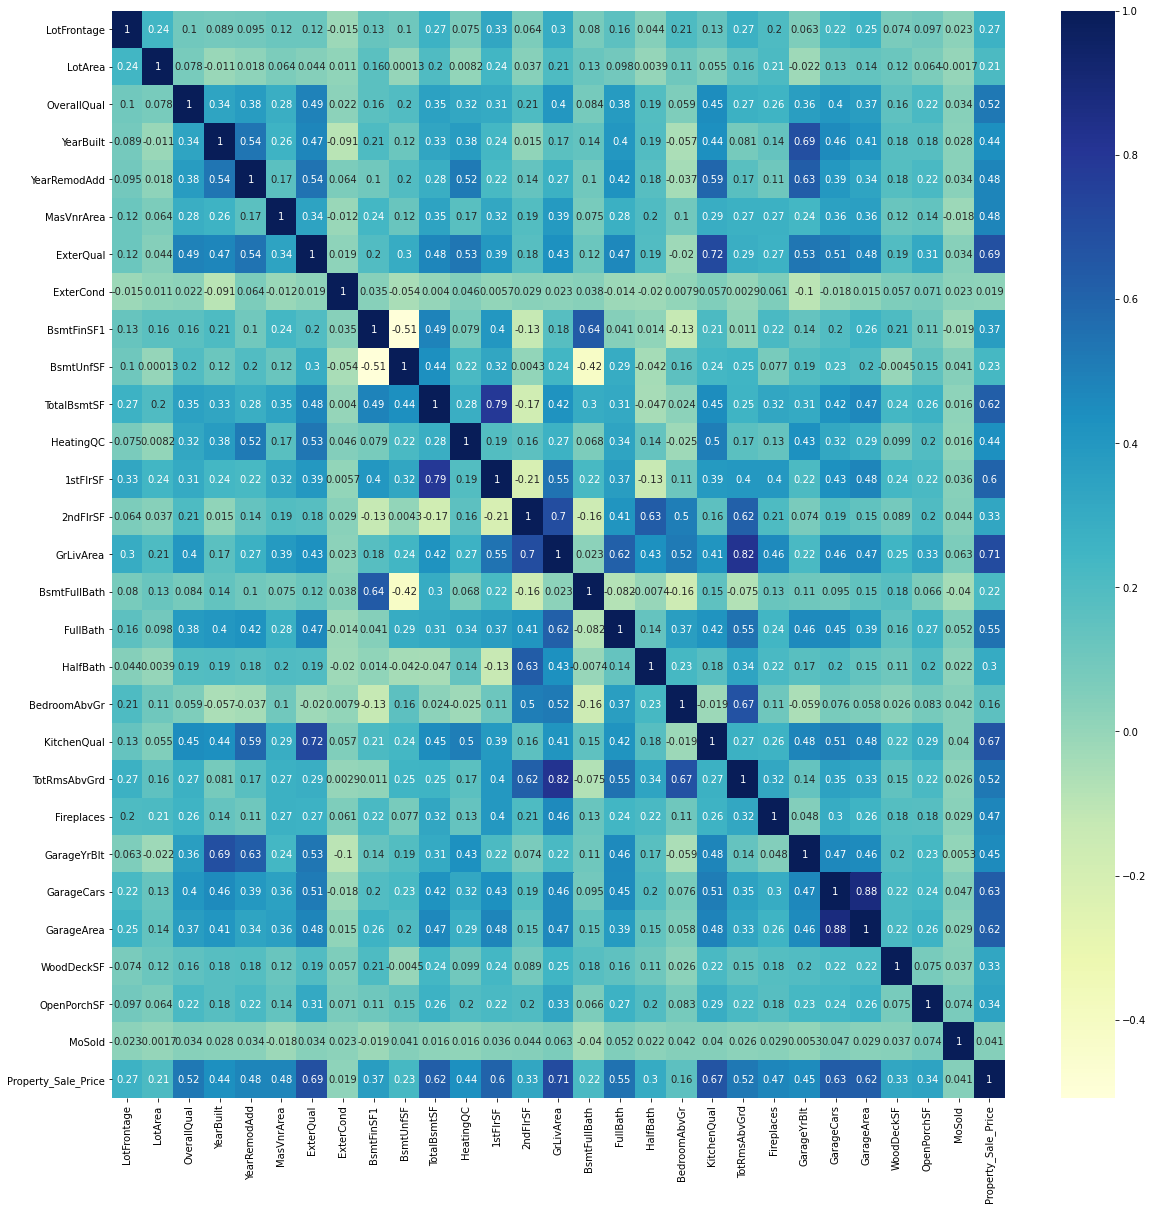

In [43]:
#Finding correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [44]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Zone_Class', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
df = pd.get_dummies(data =df, columns=['Zone_Class',
 'Property_Shape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtCond','BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2','Heating',
 'Electrical',"SaleCondition",'SaleType','PavedDrive'])
df.head()

,LotFrontage,LotArea,Utilities,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,65.0,8450,AllPub,CollgCr,Norm,7,2003,2003,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,1
1,80.0,9600,AllPub,Veenker,Norm,6,1976,1976,MetalSd,MetalSd,...,0,0,0,0,0,0,1,0,0,1
2,68.0,11250,AllPub,CollgCr,Norm,7,2001,2002,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,1
3,60.0,9550,AllPub,Crawfor,Norm,7,1915,1970,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,1,0,0,1
4,84.0,14260,AllPub,NoRidge,Norm,8,2000,2000,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,1


In [46]:
for col in df.columns:
    if ((df[col].dtype == 'object')):
        print(col)

Utilities
Neighborhood
Condition2
Exterior1st
Exterior2nd
CentralAir
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond


In [47]:
df.drop(columns=['Utilities',
'Neighborhood',
'Condition2',
'Exterior1st',
'Exterior2nd',
'CentralAir',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond'],axis=1,inplace=True)

In [48]:
df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,65.0,8450,7,2003,2003,196.0,4,3,706,150,...,0,0,0,0,0,0,1,0,0,1
1,80.0,9600,6,1976,1976,0.0,3,3,978,284,...,0,0,0,0,0,0,1,0,0,1
2,68.0,11250,7,2001,2002,162.0,4,3,486,434,...,0,0,0,0,0,0,1,0,0,1
3,60.0,9550,7,1915,1970,0.0,3,3,216,540,...,0,0,0,0,0,0,1,0,0,1
4,84.0,14260,8,2000,2000,350.0,4,3,655,490,...,0,0,0,0,0,0,1,0,0,1


In [49]:
x=df.drop(columns=['Property_Sale_Price'],axis=1)
y=df["Property_Sale_Price"]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=2)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.8867104205445083
0.8664469829193252


In [50]:
x_train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,PavedDrive_P,PavedDrive_Y
522,50.0,5000,6,1947,1950,0.0,3,4,399,605,...,0,0,0,0,0,0,1,0,0,1
1104,24.0,2016,5,1970,1970,304.0,3,3,0,630,...,0,0,0,0,0,0,1,0,0,1
1144,60.0,12180,4,1941,1950,0.0,3,2,348,324,...,0,0,0,0,0,0,1,0,0,1
909,149.0,12589,6,2005,2005,0.0,4,3,0,742,...,0,0,0,0,0,0,1,0,0,1
837,21.0,1680,6,1973,1973,158.0,3,3,330,153,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,78.0,11700,6,1968,1968,0.0,3,3,298,429,...,0,0,0,0,0,0,1,0,0,1
433,100.0,10839,6,1997,1998,0.0,3,3,0,926,...,0,0,0,0,0,0,1,0,0,1
674,80.0,9200,6,1965,1965,0.0,3,3,892,244,...,0,0,0,0,0,0,1,0,0,1
1099,82.0,11880,7,1978,1978,206.0,3,3,704,567,...,0,0,0,0,0,0,0,0,0,1


In [51]:
y_train

522     159000
1104    106000
1144     80000
909     174000
837     100000
         ...  
1071    154000
433     181000
674     140000
1099    157000
1608    174000
Name: Property_Sale_Price, Length: 1451, dtype: int64

In [52]:
x=df.drop(columns=["Property_Sale_Price"],axis=1)
y=df["Property_Sale_Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [53]:
print(x_test)

      LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
1339   120.000000     9560            5       1972          1972         0.0   
1341    66.000000    13695            6       2003          2004         0.0   
1184    50.000000    35133            5       1963          1963       226.0   
310     72.056475     7685            6       1993          1994       112.0   
1709    69.000000    11948            5       2000          2012       132.0   
...           ...      ...          ...        ...           ...         ...   
1259    65.000000     9750            6       1969          1969         0.0   
1775    82.000000     6209            8       1920          1999       673.0   
1088    24.000000     2522            7       2004          2004        70.0   
1340    70.000000     8294            4       1971          1971         0.0   
1832    74.000000     8834            9       2004          2005       216.0   

      ExterQual  ExterCond  BsmtFinSF1 

In [54]:
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8869594470888675
0.8686186878714133


# Score improvement

In [55]:
from sklearn.preprocessing import MinMaxScaler 


In [56]:
# Standardization
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

model.fit(x_train, y_train)  
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.8857487856875199
-1.896611343884421e+24


# Result

Train Score 0.8869594470888675

Test Score 0.8686186878714133